In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Analysis and understanding of the data

In [2]:
#Load the dataset
df = pd.read_csv(r"D:\DSML class\Data\Hospital_Data_resource_allocation.csv")

## Observation of the data

In [3]:
# Display first five rows of the dataset
print('\nFirst five rows of the dataset')
df.head(5)


First five rows of the dataset


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [4]:
df.shape

(318438, 18)

In [5]:
# Getting the overview of the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
#Defining Numerical and Categorical columns
numerical_columns = df.select_dtypes(include='number')
categorical_columns = df.select_dtypes(include='object')

In [7]:
# Checking the summary Statistics of the numerical columns
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [8]:
#Unique values and it's count unique of all columns
print('\nUnique values in categorical columns')
categorical_columns.nunique()


Unique values in categorical columns


Hospital_type_code       7
Hospital_region_code     3
Department               5
Ward_Type                6
Ward_Facility_Code       6
Type of Admission        3
Severity of Illness      3
Age                     10
Stay                    11
dtype: int64

## Data Processing

In [9]:
# Duplicate value check
df[df.duplicated()]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay


In [10]:
# Checking missing values
df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [11]:
df.groupby(['patientid', 'City_Code_Patient']).count().reset_index()['City_Code_Patient'].isna().sum()

0

### Insight:
- There are missing values in Bed grade and City code of the patient.
- The analysis shows that the all the patient's city code has been collected at some point of time during their visits to the hospitals.

## Abnormality check

In [12]:
#Check for abnormal values in Age group
df['Age'].unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       'Nov-20', '0-10', '91-100'], dtype=object)

11-20 age group has been recorded as Nov-20 needs to be changed to 11-20

In [301]:
# Create a function to correct age group name
def groupNameChange(x):
    if x == 'Nov-20':
        return '11-20'
    else:
        return x

In [14]:
df['Age'] = df['Age'].apply(groupNameChange)

In [303]:
#Checking for abnormalities in Age
df['Age'].unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [302]:
#Checking for abnormalities in Stay
df['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

Again 11-20 age group has been recorded as Nov-20 needs to be changed to 11-20

In [17]:
df['Stay'] = df['Stay'].apply(groupNameChange)

In [18]:
df['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

## Univariate analysis

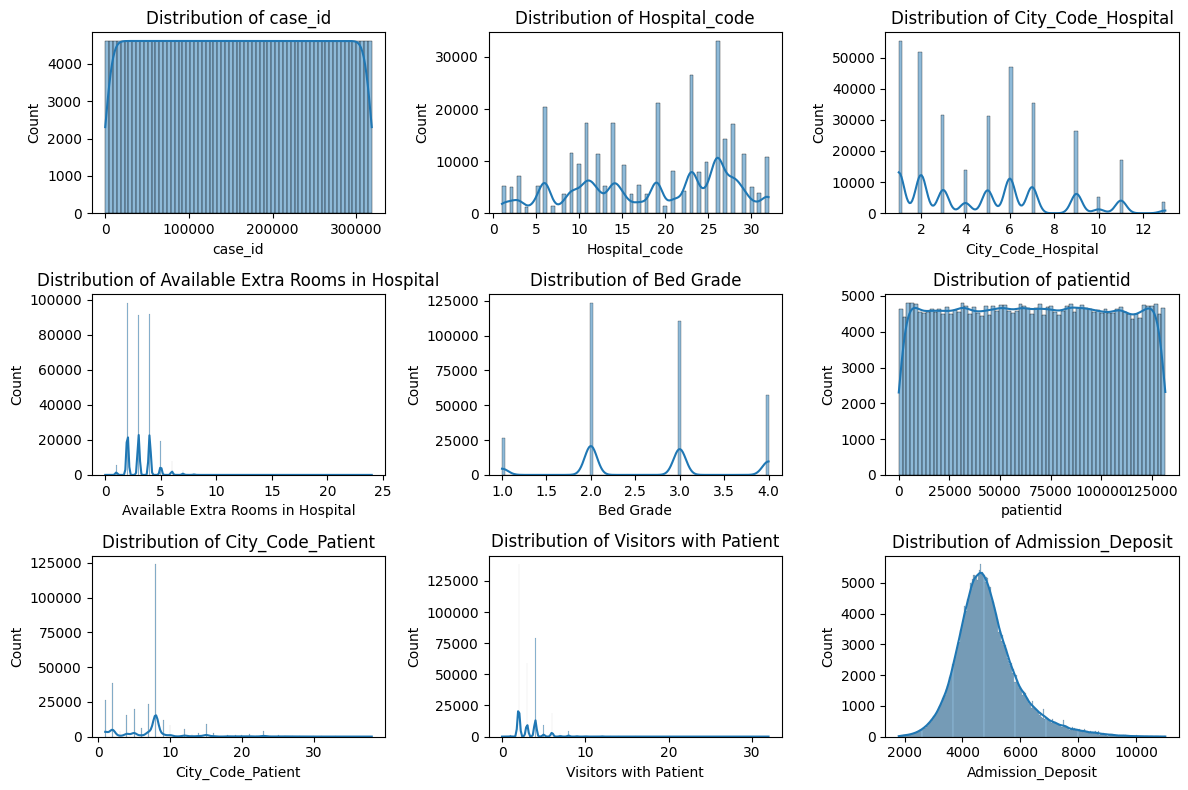

In [19]:
plt.figure(figsize=(12,8))
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

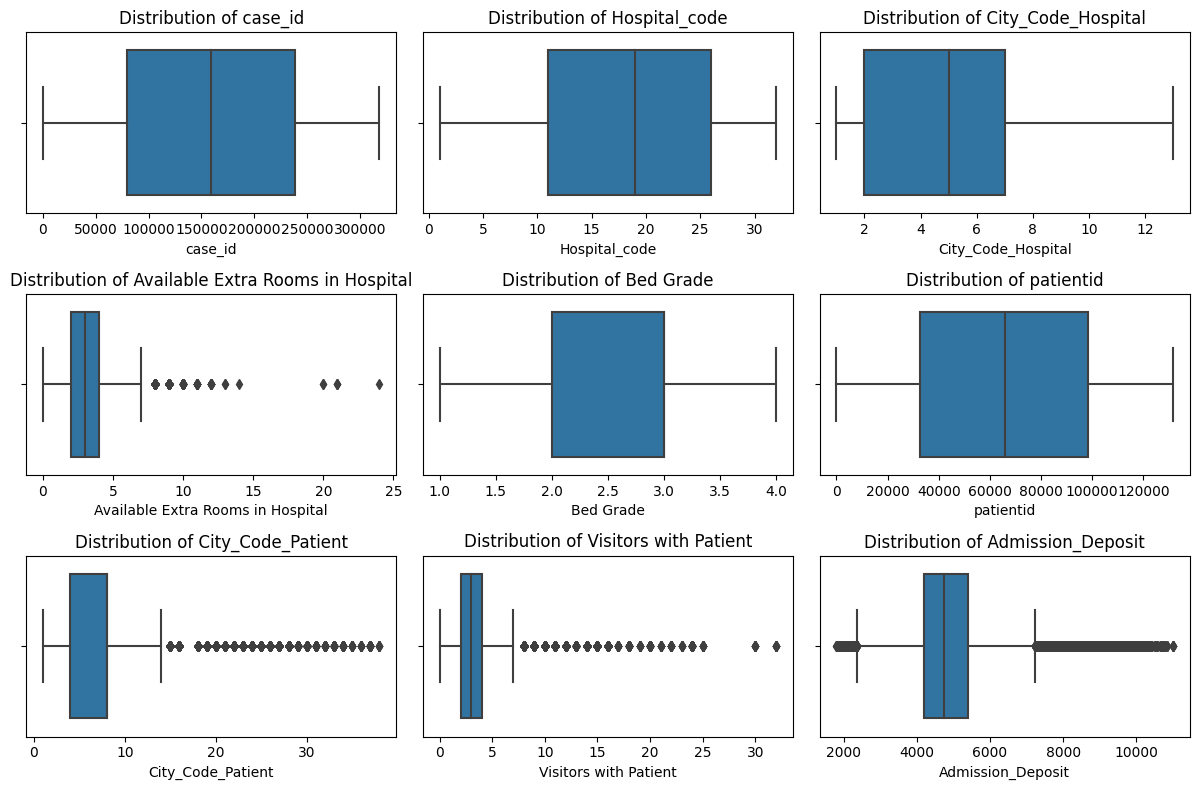

In [305]:
# Plotting box plot for all numerical columns
plt.figure(figsize=(12,8))
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

## Exploring Patient Demographics

### Patient age wise analysis

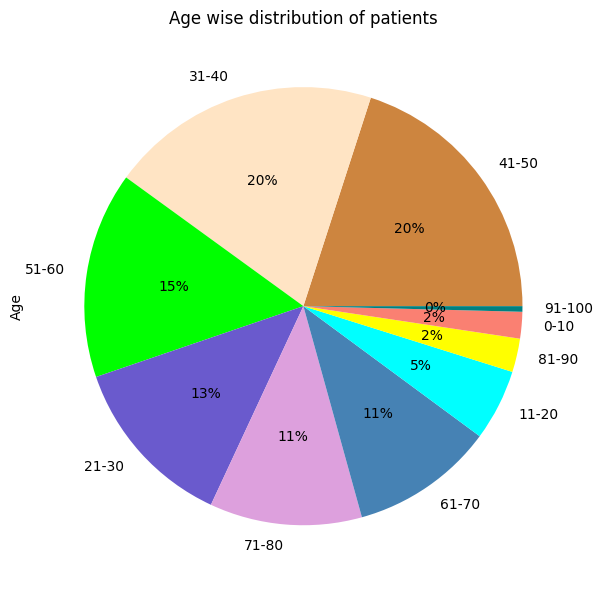

In [195]:
#Age wise analysis
plt.figure(figsize=(10,6))
df['Age'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['peru', 'bisque', 'lime', 'slateblue', 'plum', 'steelblue', 'aqua', 'yellow', 'salmon', 'teal', 'lightcoral'])
plt.title('Age wise distribution of patients')
plt.tight_layout()
plt.show()

In [306]:
# Age vs department
ad = pd.crosstab(df['Age'], df['Department'], margins=True)
ad

Department,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery,All
Age,,,,,,
0-10,387,464,4362,943,98,6254
11-20,694,1315,13021,1694,44,16768
21-30,1237,3320,33437,2771,78,40843
31-40,1563,5030,53296,3626,124,63639
41-50,1717,5608,52212,4031,181,63749
51-60,1858,4875,37798,3779,204,48514
61-70,1308,3860,24460,3864,195,33687
71-80,704,4062,24925,5903,198,35792
81-90,76,913,5236,1598,67,7890


<Axes: xlabel='Age'>

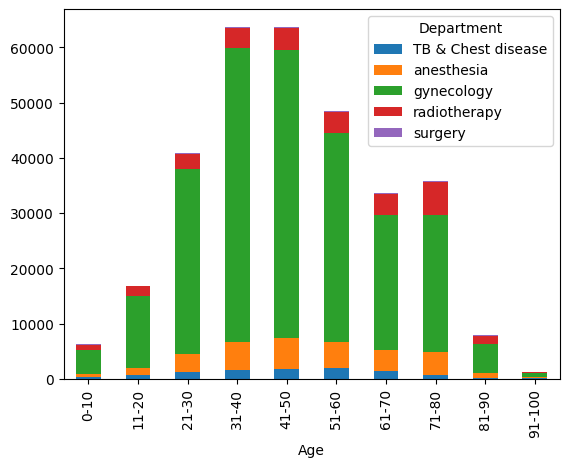

In [160]:
ad.plot(kind='bar', stacked=True)

### Insights:
- The patients having the age between 30 and 50 contribute to 40% of the entire data.
- Irrespective of the age group gynecology department has the highest number of patients with 249486 out of 318438 which is 78% of the whole data.
- The management should focus making sure that all required resources are available for the department to cope up with the demand.

### Patient city wise analysis

In [43]:
ptcountcitywise = df.groupby('City_Code_Patient').patientid.nunique()

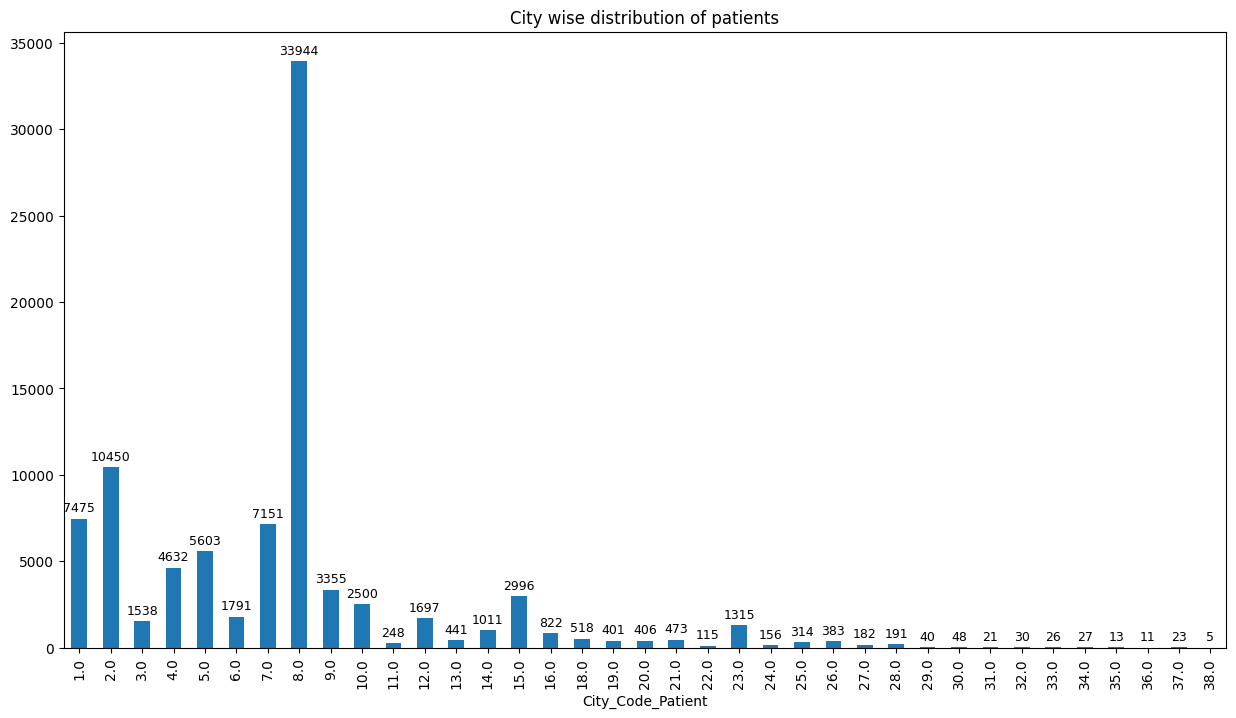

In [99]:
plt.figure(figsize=(15,8))
ax = ptcountcitywise.plot(kind='bar')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('City wise distribution of patients')
plt.show()

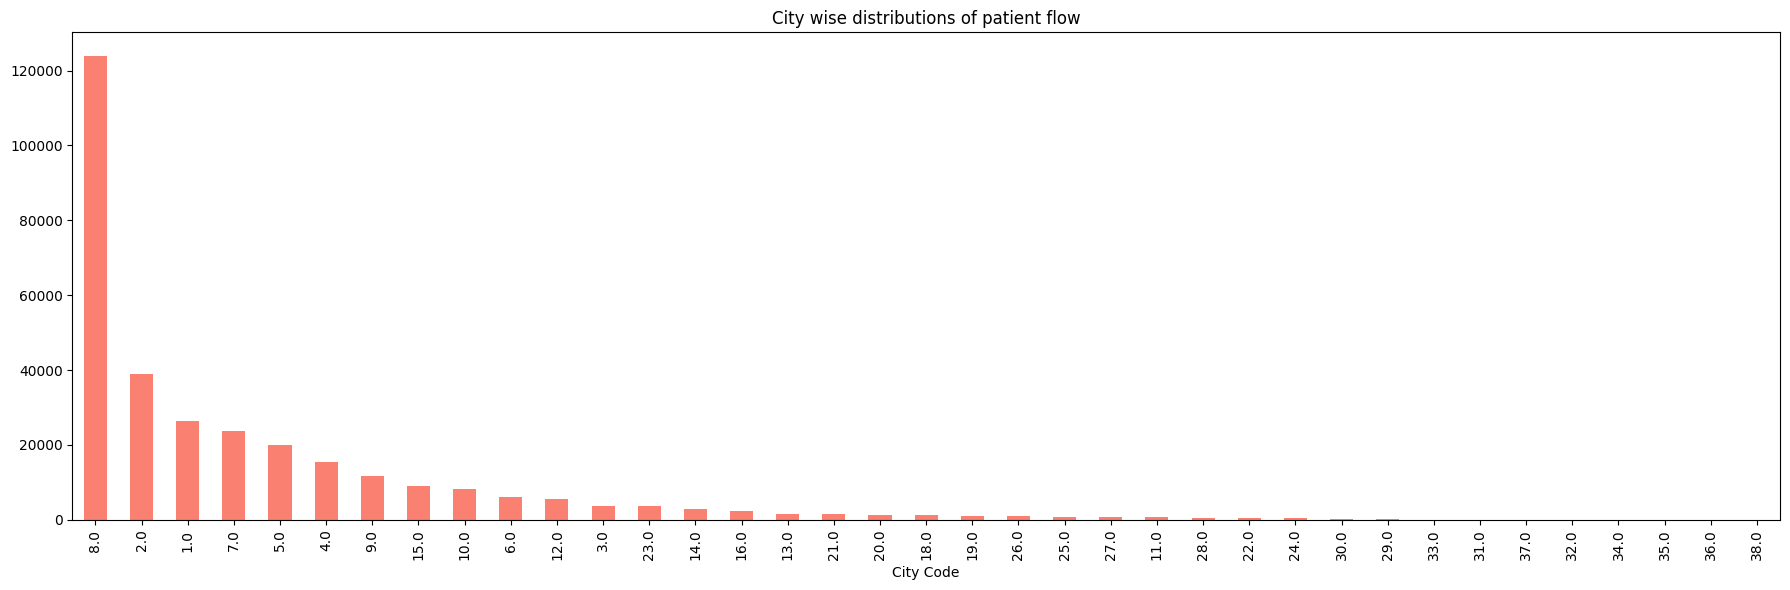

In [104]:
plt.figure(figsize=(18, 6))
df['City_Code_Patient'].value_counts().plot(kind='bar', color='salmon')
plt.title('City wise distributions of patient flow')
plt.xlabel('City Code')
plt.tight_layout()
plt.show()

In [71]:
print('\nTop five cities with highest patient count')
ptcountcitywise.sort_values(axis='index', ascending=False).head(5)


Top five cities with highest patient count


City_Code_Patient
8.0    33944
2.0    10450
1.0     7475
7.0     7151
5.0     5603
Name: patientid, dtype: int64

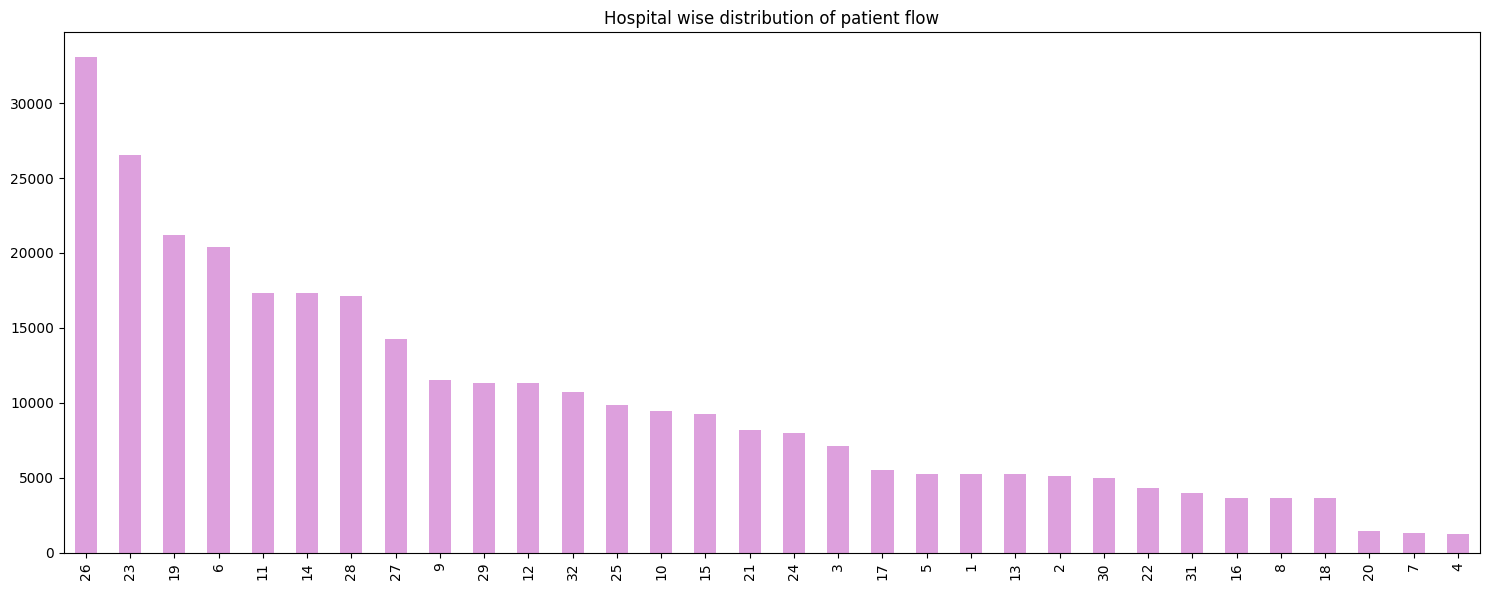

In [187]:
plt.figure(figsize=(15,6))
df['Hospital_code'].value_counts().plot(kind='bar', color='plum')
plt.title('Hospital wise distribution of patient flow')
plt.tight_layout()
plt.show()

### Insight:
- The city with code 8 has the highest contribution to the patient count as well as the patient flow.
- Out of all the hospital the hospital with code 26 has the highest patinet flow and code 4 has the lowest.

## Analyzing Illness Severity

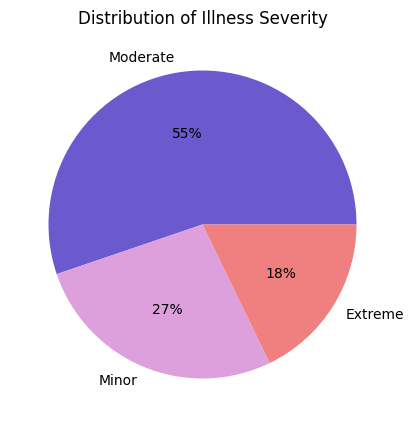

In [193]:
plt.figure(figsize=(8, 5))
df['Severity of Illness'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['slateblue', 'plum', 'lightcoral'])
plt.title('Distribution of Illness Severity')
plt.ylabel('')
plt.show()

In [201]:
ss = pd.crosstab(df['Severity of Illness'], df['Stay'])

<Figure size 1500x800 with 0 Axes>

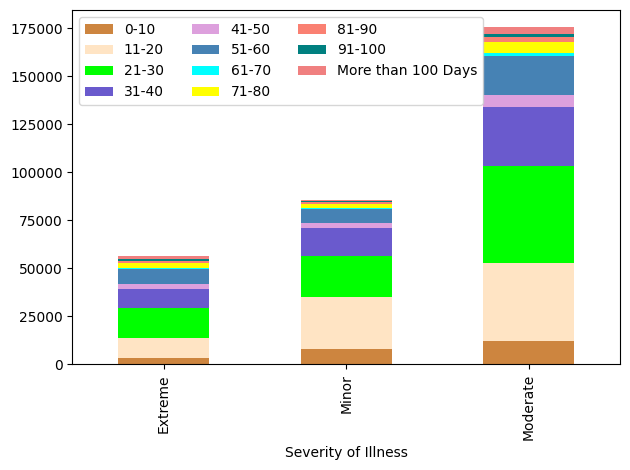

In [203]:
plt.figure(figsize=(15,8))
ss.plot(kind='bar', stacked=True, color=['peru', 'bisque', 'lime', 'slateblue', 'plum', 'steelblue', 'aqua', 'yellow', 'salmon', 'teal', 'lightcoral'])
plt.legend(ncols=3, loc='upper left')
plt.tight_layout()
plt.show()

In [233]:
pd.crosstab(df['Severity of Illness'], df['Stay'], normalize=True, margins=True)

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days,All
Severity of Illness,,,,,,,,,,,,
Extreme,0.010674,0.033030,0.048681,0.031673,0.007383,0.024422,0.002032,0.008086,0.003495,0.002528,0.006124,0.178129
Minor,0.024702,0.085043,0.067627,0.045368,0.009421,0.022384,0.001630,0.006055,0.003093,0.001335,0.003008,0.269666
Moderate,0.038749,0.127309,0.158442,0.096176,0.020073,0.063161,0.004955,0.018060,0.008605,0.004820,0.011855,0.552205
All,0.074124,0.245382,0.274751,0.173217,0.036877,0.109968,0.008617,0.032201,0.015193,0.008683,0.020987,1.000000


In [212]:
st = pd.crosstab(df['Severity of Illness'], df['Type of Admission'])

<Figure size 1500x800 with 0 Axes>

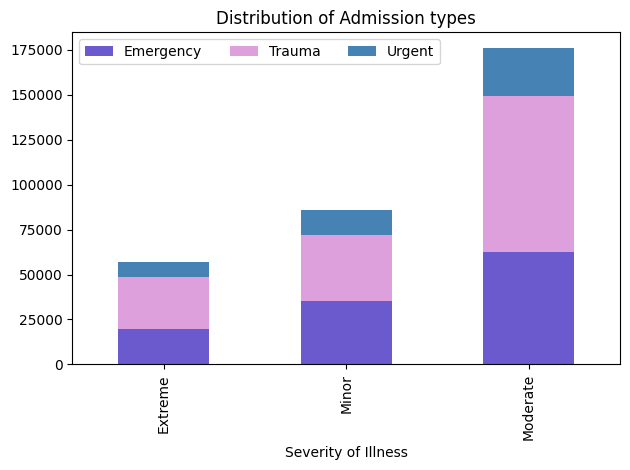

In [222]:
plt.figure(figsize=(15,8))
st.plot(kind='bar', stacked=True, color=['slateblue', 'plum', 'steelblue',])
plt.legend(ncols=3, loc='upper left')
plt.title('Distribution of Admission types')
plt.tight_layout()
plt.show()

In [223]:
pd.crosstab(df['Severity of Illness'], df['Type of Admission'], margins=True)

Type of Admission,Emergency,Trauma,Urgent,All
Severity of Illness,,,,
Extreme,19844,28837,8042,56723
Minor,35356,36800,13716,85872
Moderate,62476,86624,26743,175843
All,117676,152261,48501,318438


### Insights:
- 55% of the cases admitted to the hospitals are moderate cases.
- The admission type Trauma contributes to 48% of the total cases admitted out of which 56% are moderate.
- The urgent admission type has the least number of cases which contibutes only 15% of all the cases admitted.
- 27% of the patients admitted stay in a rage of 21-30 days in which more than 50% belongs to the moderate illness type. 
- Approximately 69% of the patients stay in the hospital ranging from 11 to 40 days.

## Admission Types Analysis:

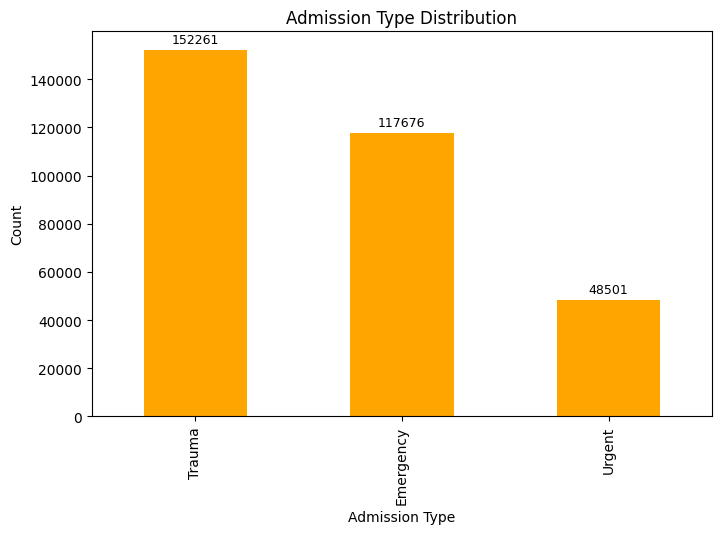

In [237]:
plt.figure(figsize=(8, 5))
ax = df['Type of Admission'].value_counts().plot(kind='bar', color='orange')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Admission Type Distribution')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()

### Insights:
- The most of the cases admitted to the hospital belongs to the type Trauma and emergency. 

## Ward Utilization Examination:

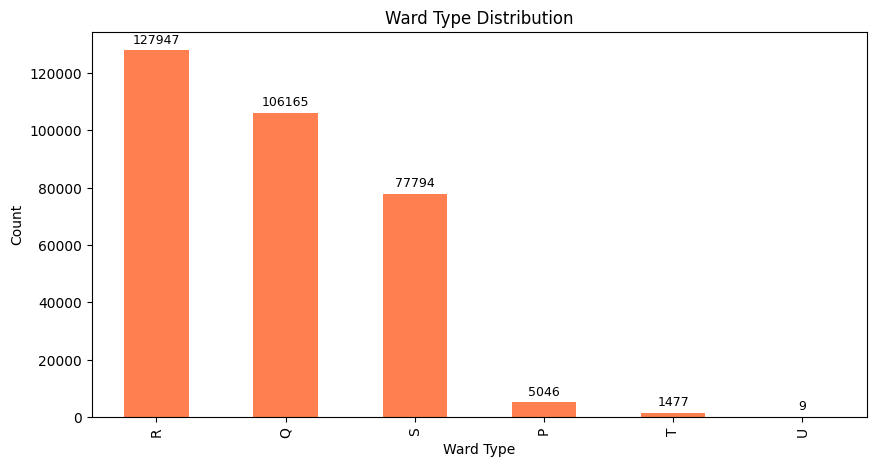

In [247]:
plt.figure(figsize=(10,5))
ax = df['Ward_Type'].value_counts().plot(kind='bar', color='coral')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Ward Type Distribution')
plt.xlabel('Ward Type')
plt.ylabel('Count')
plt.show()

### Insights:
- The ward types R, Q and S are used widely where as the types P, T and U are under utilized. 
- The trend shows that the patients prefer to use the types R, Q and S.
- The hospital management can think about converting the P, T and U types to those preferred by the patients.

## Hospital Utilization Assessment

In [287]:
ha = df.groupby(['Hospital_type_code']).agg({'Available Extra Rooms in Hospital': 'sum'}).reset_index().sort_values(by='Available Extra Rooms in Hospital', ascending=False).reset_index()
ha.drop('index', axis=1, inplace=True)

<Figure size 800x500 with 0 Axes>

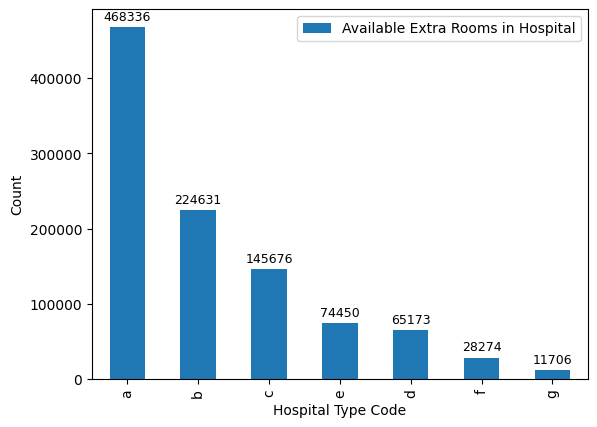

In [300]:
plt.figure(figsize=(8,5))
ax = ha.plot(kind='bar', x='Hospital_type_code')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Hospital Type Code')
plt.ylabel('Count')
plt.show()

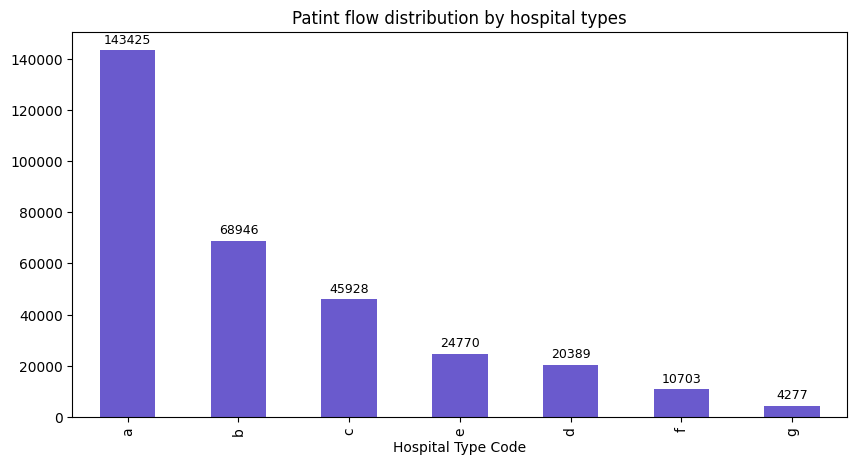

In [292]:
plt.figure(figsize=(10,5))
ax = df['Hospital_type_code'].value_counts().plot(kind='bar', color='slateblue')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Patint flow distribution by hospital types')
plt.xlabel('Hospital Type Code')
plt.show()

### Insights:
- The distribution of availability of the rooms is exactly according to the intensity of the patient flow in the corresponding hospital type.

## Overall Insights:

- Missing values are present in the Bed Grade and City Code of the Patient columns, but all patients' city codes were eventually collected during their hospital visits.
- Patients aged between 30 and 50 constitute 40% of the entire dataset.
- Gynecology department has the highest patient count, accounting for 78% of the total data.
- City with code 8 has the highest contribution to patient count and flow.
- Hospital code 26 has the highest patient flow, while code 4 has the lowest.
- Moderate cases comprise 55% of hospital admissions, with Trauma being the most common admission type (48% of total cases).
- Patients admitted for Trauma have a moderate illness severity in 56% of cases.
- A significant portion (27%) of admitted patients stay for 21-30 days, with over 50% having moderate illness severity.
- Approximately 69% of patients stay in the hospital for 11-40 days.
- Wards R, Q, and S are widely used, while P, T, and U are underutilized.
- Patients tend to prefer wards R, Q, and S over others.

## Recommendations:

- Ensure availability of resources in the Gynecology department to meet the high demand.
- Focus on improving data collection processes to minimize missing values in the dataset.
- Allocate resources according to patient flow trends, with extra attention to hospitals in cities with code 8 and hospital code 26.
- Enhance services and facilities in wards R, Q, and S to meet patient preferences, and consider converting underutilized wards (P, T, and U) to preferred types.
- Tailor resource allocation and capacity planning based on the distribution of patient stays and admission types.
- Implement strategies to reduce patient stays by improving treatment efficiency and care delivery, especially for moderate cases.
- Develop targeted marketing or outreach efforts to educate patients about available services in underutilized wards.
- Regularly review and adjust resource allocation strategies based on evolving patient demographics and hospital utilization patterns.